<a href="https://colab.research.google.com/github/Jeevan-NM/Bike-Sharing-Demand-Prediction/blob/main/BikeSharingDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike sharing demand prediction.**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Problem Statement**


**Buisness context.**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ALMABetter/Capstone Projects/SeoulBikeData.csv",encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

We can see from the above that there are 14 columns and 8760 rows in the dataset loaded.

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We can see from the above that most of the data present in the dataset are of integer type or float type, and there are no null values present.

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

There are no duplicate entries in the dataset loaded. 

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

From the above we can see that there are no null values present in any column of the dataset.

### Information gathered about the dataset.

The given dataset contains data about the different condition that influence the number bikes required and the bikes supplied for a particular day in Seoul which is the capital of SouthKorea.

Here bike sharing demand prdiction refers to predicting the number of bike for rent that may be required on a particular day at a particular hour with various conditions given.Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes, using the values in the other columns

The dataset given consists of 14 columns and 8760 rows i.e data of 8760 days. The dataset contains no missing, null or duplicate values, it has the data from the ending of 2017 upto the ending of 2018.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The above output shows how the numerical data of the dataset is distributed.

In [12]:
#describing categorical data
df.describe(include=['object','category'])

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


Lets check the different data present in each categorical column.

In [13]:
df['Seasons'].value_counts().reset_index()

,index,Seasons
0,Spring,2208
1,Summer,2208
2,Autumn,2184
3,Winter,2160


There are four seasons spring, summer, autumn, and winter. 

In [14]:
df['Holiday'].value_counts().reset_index()

,index,Holiday
0,No Holiday,8328
1,Holiday,432


Holiday are those day when its weekend or any official holidays.

In [15]:
df['Functioning Day'].value_counts().reset_index()

,index,Functioning Day
0,Yes,8465
1,No,295


Lets check about functioning day as it is a bit ambiguous.

In [16]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

From the above we can confirm that during non functioning days bikes are not provided for rent.

In [17]:
#segregating numerical and categorical variables
numerical_features=df.describe().columns
categorical_feature=df.describe(include=['object','category']).columns
print(f'Numerical features: ',numerical_features)
print(f'Categorical features: ',categorical_feature)

Numerical features:  Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')
Categorical features:  Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')


### Variables Description 

The description of the different variables present in the dataset are:

*   **Date** : Date of bike rented.
*   **Rented** Bike count : Number of total rentals.
*   **Hour** : Hours of the day.
*   **Temperature** : Temperature at the particular hour of the day in degree celsius.
*   **Humidity(%)** : Humidity of the day. : 
*   **Wind speed (m/s)** : Wind speed in metre per second at the particular hour of the day.
*   **Visibility** : Atmospheric visibility within 10m range.
*   **Dew point temperature(°C)** : Dew point temperature in degree ceelsius.
*   **Solar Radiation (MJ/m2)** : Indicate light and energy that comes from the sun in MJ/m2.
*   **Rainfall(mm)** : Rain fall in mm.
*   **Snowfall (cm)** : Snow fall in cm.
*   **Seasons** : Diferrent seasons(decided based on weather conditions) throughout the year present.
*   **Holiday** : Whether the day is considered a holiday.
*   **Functioning Day** : 	Whether the day is neither a weekend nor holiday. The day during which the provider of rented bike is functional.



Here the dependent variable is Rented bike count.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

From the data description we got to know that rented bikes are provided only on functional days and are not provided on non functional days so lets remove those records which contain data about non functional days.

In [19]:
#Removing data of non functional days (non rented days)
df.drop(df[df['Functioning Day'] == 'No'].index,inplace=True)

In [20]:
df['Functioning Day'].value_counts()

Yes    8465
Name: Functioning Day, dtype: int64

Since we have removed the data of non functional days and the column contains only single type of data, since it has the same value for each record we can drop the column as it of no use.

In [21]:
df.drop(['Functioning Day'], axis = 1,inplace=True)

In [22]:
df.shape

(8465, 13)

Now we can see that our data contains only 13 columns as we have removed the functional day column.

We have another categorical column which is the date. We can extract information such as the day of the week and the month which may help in a more accurate prediction.

In [23]:
#Lets check the data type of the date column
type(df['Date'][0])

str

We can see that the date column contains of data of string type. We should convert this to date type to get the day and month.

In [24]:
from datetime import datetime
df['Date']=df['Date'].apply(lambda x:datetime.strptime(x,'%d/%m/%Y'))
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Lets create another column which contains data about which day of the week does the specific date belongs to. Here 0 refers to Monday and 6 refers to sunday.

In [25]:
df['Weekday']=df['Date'].apply(lambda x:x.weekday())


In [26]:
df['Weekday'].value_counts().reset_index().sort_values(by="index").rename(columns={'index':'Weekday','Weekday':'Count of each day'}).set_index('Weekday')


,Count of each day
Weekday,
0,1248
1,1152
2,1200
3,1200
4,1224
5,1217
6,1224


The above shows the count of each day of the week in the given dataset.

In [27]:
#Now lets seperate day, month and year from the date column
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df['Day']=df['Date'].apply(lambda x:x.day)

Since we have seperated all the details fom the date column and placed it in different columns we can drop the column date as all of its data are stored separately. 

In [28]:
df.drop('Date',axis=1,inplace=True)

In [29]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Weekday,Month,Year,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1


In [30]:
df.shape

(8465, 16)

Now we can see that our data has 16 columns and 8465 rows.

### What all manipulations have you done and insights you found?

 In the data wrangling part we removed the column functioning day , it contained the data of whether the bike rental agency was functioning or not, on non functional days bikes were not provided for rent, so sinsce no bikes were provided for rent on a non functional day the data is of no use for the analysis. The data left in the functional day column were the sames after removing the non functional day data for each record, so its presence is of no use for the prediction hence we removed the whole column.

 In continuation with the above we used the Date column of the data to extract some more information from it. Since the data contained in the Date column was of the data type string we first converted into Datetime object using the strptime function from the datetime module, then we extracted the day of the week the date belongs to, month and year fom the data and stored the values in separate columns so that would be easier for the analysis. Since we had all the data of the date column stored in eparate columns we dropped the column Date. In the weekday column the data consists of values in the range 0-6
 they represent each day of the week in sequence like
 
 0 -> Monday

 1 -> Tuesday
 
 2 -> Wednesday

 3 -> Thursday

 4 -> Friday

 5 -> Saturday

 6 -> Sunday


So from this information we can analyse on which day of the week more bikes were rented, this would help in a better prediction of the dependent variable.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

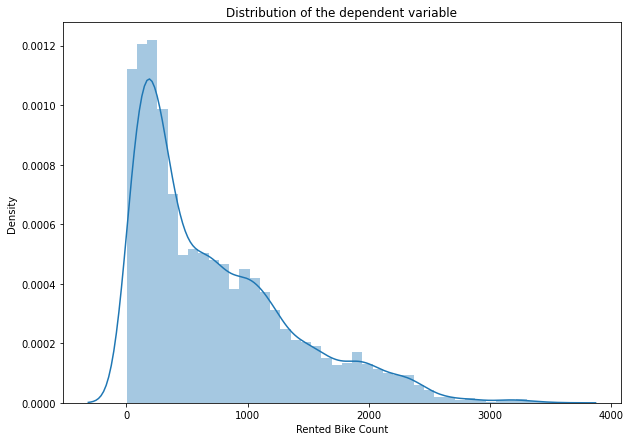

In [31]:
# Chart - 1 Distribution of the dependent variable
plt.figure(figsize = (10,7))
sns.distplot(df['Rented Bike Count'])
plt.title('Distribution of the dependent variable')
plt.ioff()

##### 1. Why did you pick the specific chart?

We have used the distplot from the seaborn library.
Distplot refers to distribution plots, it depicts the variation in the data distribution. It represents the overall distribution of the continuous data, it depicts the data by a histogram and a line in combination with it.

##### 2. What is/are the insight(s) found from the chart?

We can see from the distplot that the data is positively skewed distribution. Applying log or square root would make it a normal distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that on most of the number of bikes hired is in the range 400 to 500.
Since we are analysing the distribution of the dependent variable itself we cannot infer about the growth.

#### Chart - 2

In [32]:
numeric_features=df.describe().columns

In [33]:
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekday',
       'Month', 'Year', 'Day'],
      dtype='object')

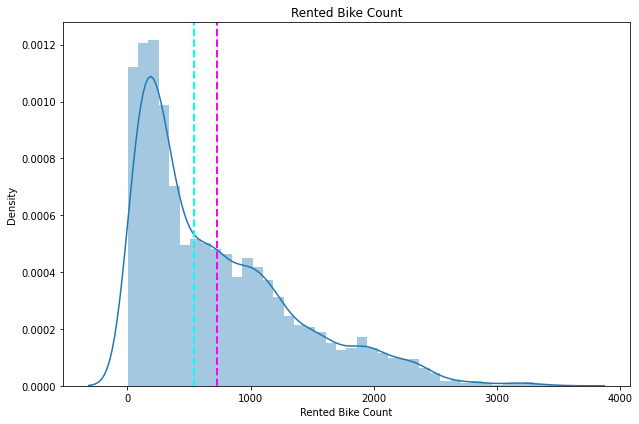

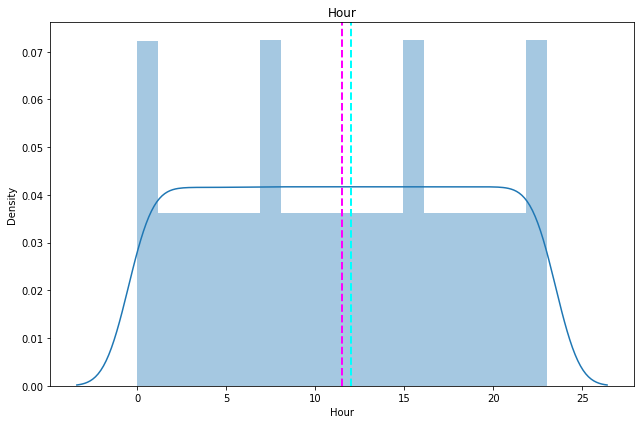

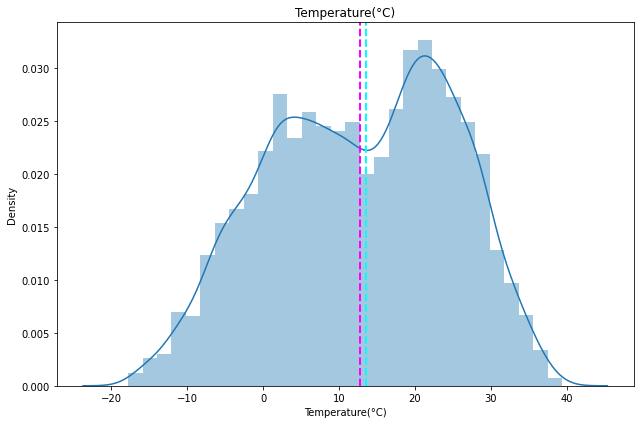

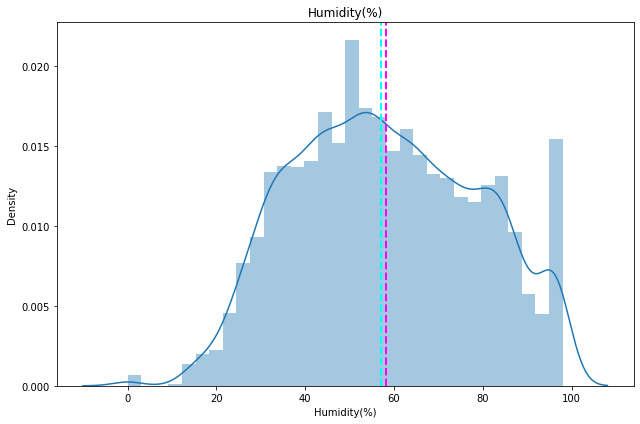

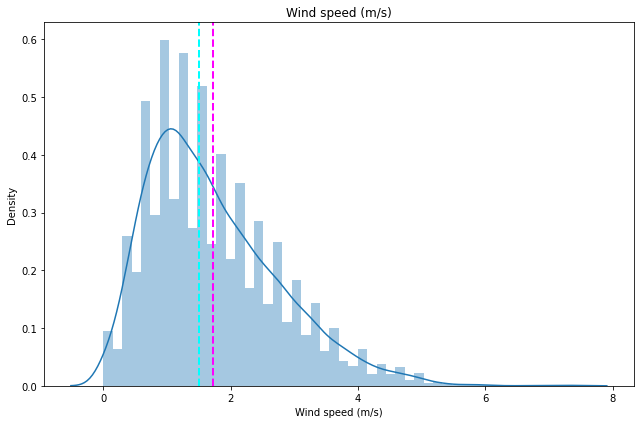

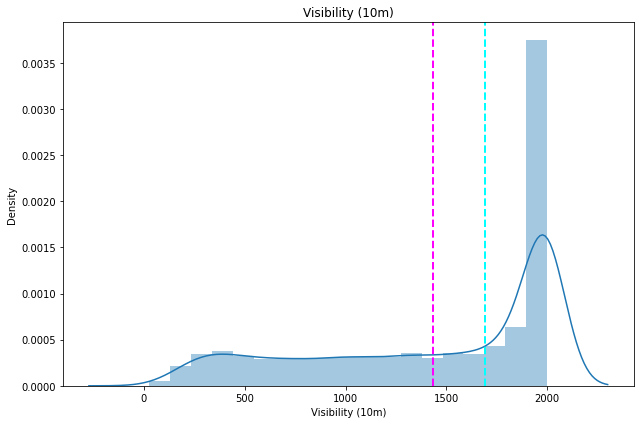

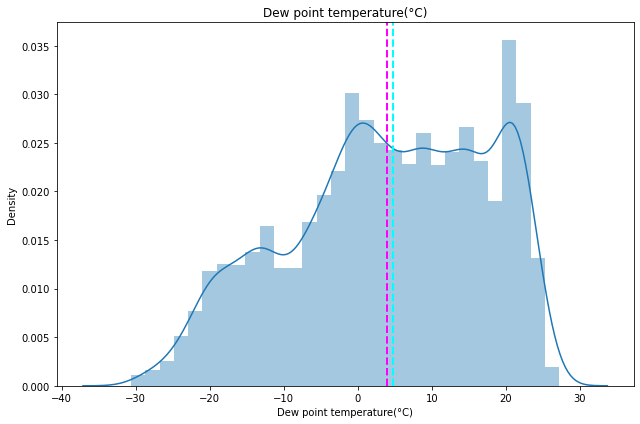

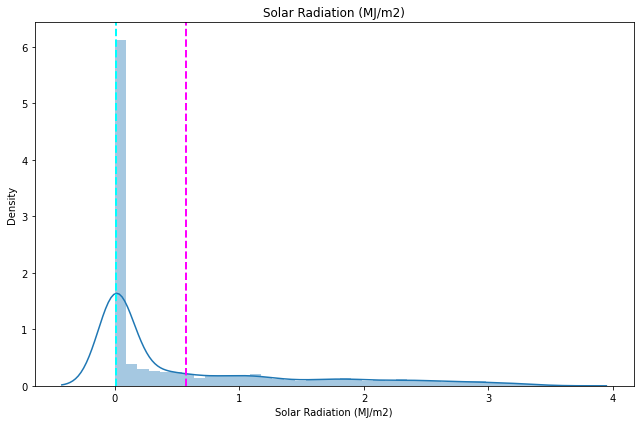

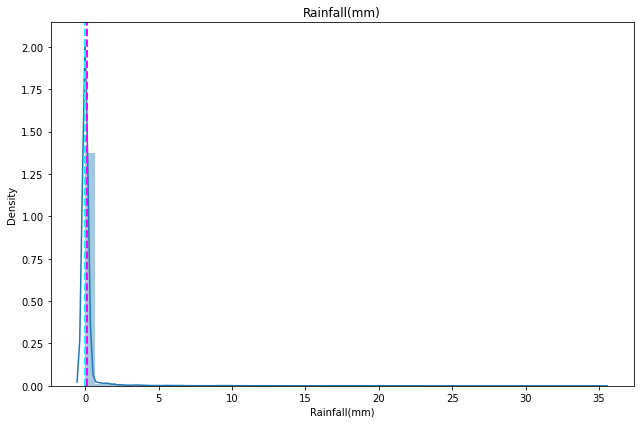

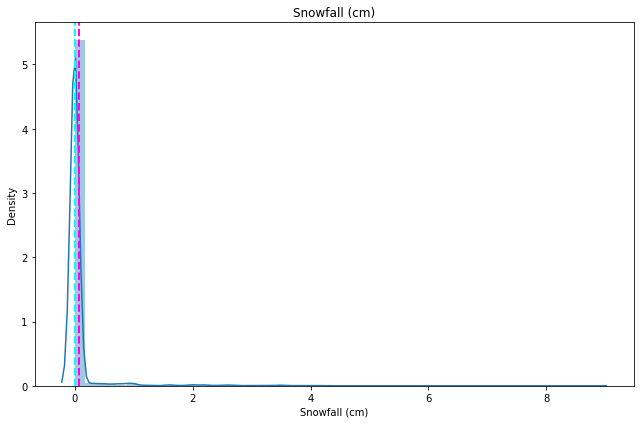

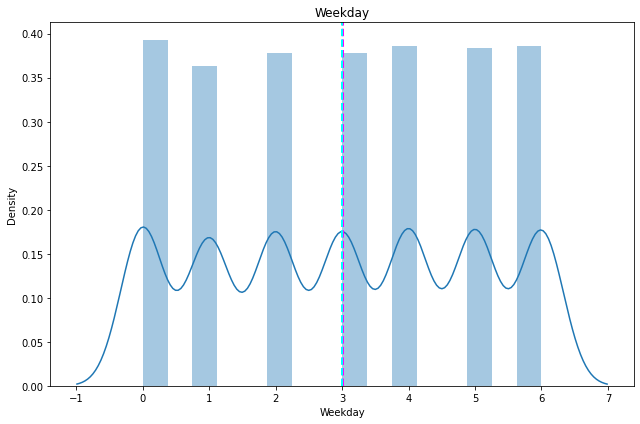

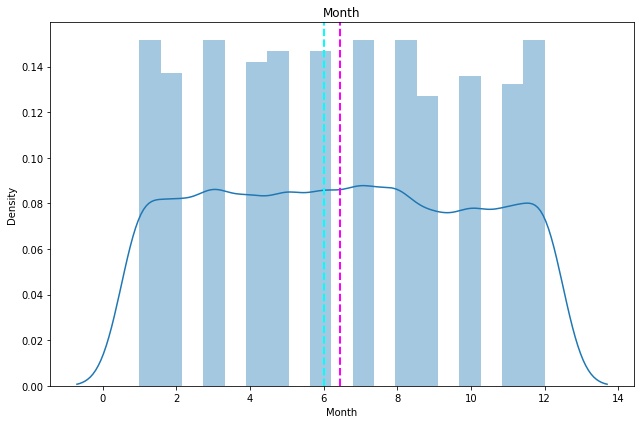

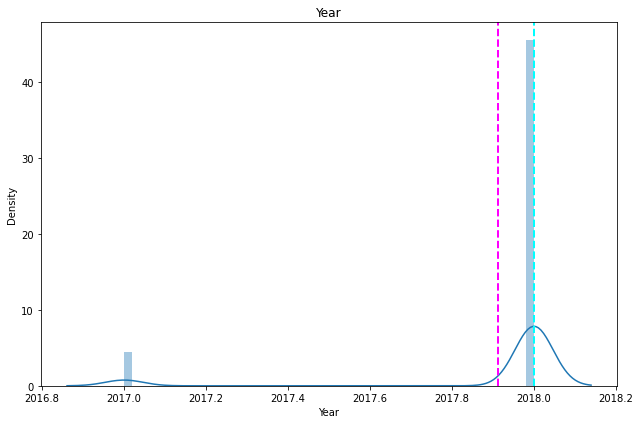

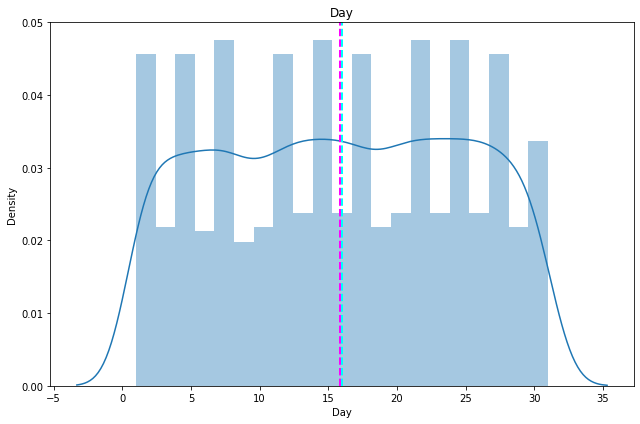

In [34]:
# Chart - 2 Distribution of every numerical feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(a=feature, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
    plt.tight_layout()
plt.show()


#####  What is/are the insight(s) found from the chart?

We are able to see the distribution of the data of different numeric data. Some of the data are positively skewed, some of the data are negatively skewed and some are normaly distributed, we will be dealing with each data in the coming parts. 

#### Chart - 3

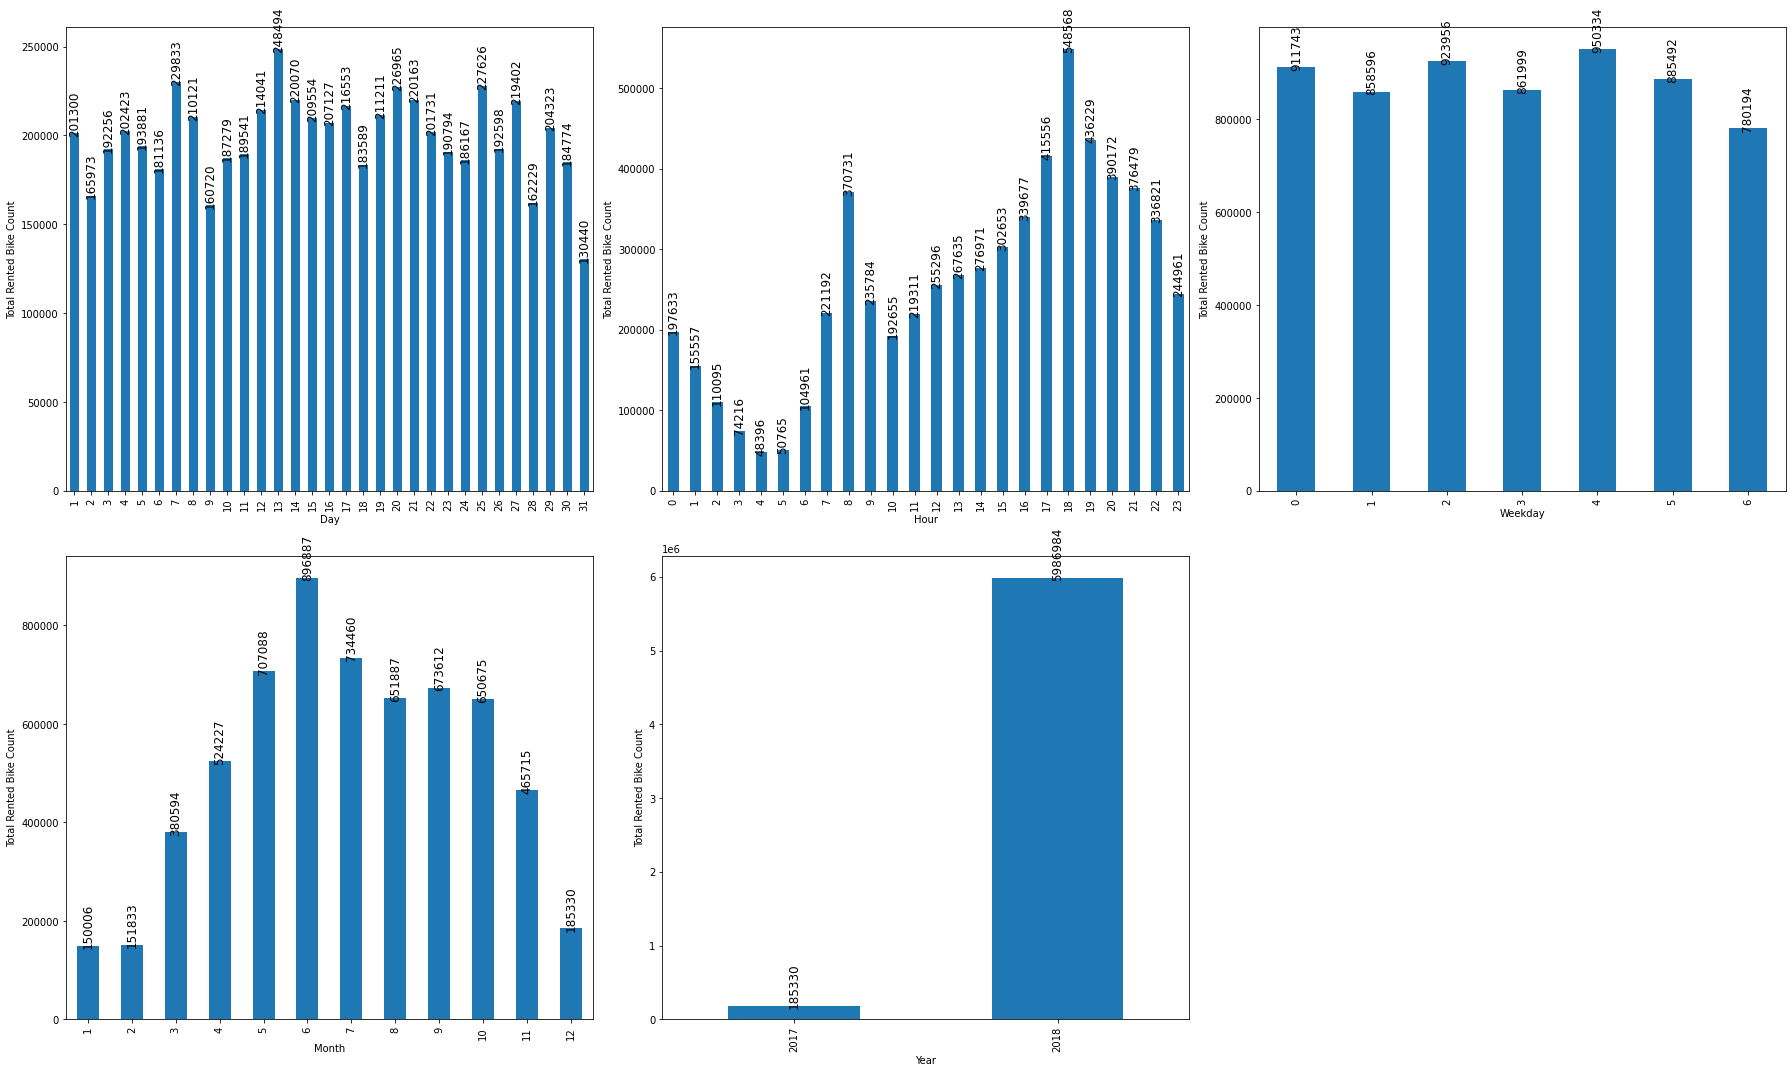

In [35]:
# Chart - 3 distribution of the discrete numerical data with respect to the count of, number of bikes rented
num_discrete_value=[feature for feature in numeric_features if len(df[feature].unique())<32]

fig = plt.figure(figsize=(25,15))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(2,3,index+1)
  dataset=df.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar') #kind=bar use for ploting barchart
  feature = df[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

##### 1. Why did you pick the specific chart?

We have used the barplot, since the data is discrete the barplot gives us a good visualization of the count of each of the discrete values.

##### 2. What is/are the insight(s) found from the chart?

1)From the first plot of he above figures we can see that the total number of bikes being rented on different days of the month are almost equal, which means that the demand for the bikes is almost the same troughout th month.

2)The next plot shows the total number of bikes rented at different time  of the day, we can see that the demand increases as we past afternoon and has the highest demand at evening time around 6:00 pm.

3)The next plot shows the distribution if different weeks of the day which is almost the same throughout the week.

4)The next plot shows the number of bikes rented in different months of the year, we can see that n=more bike are rented during the mid of the year compared to the start and last of the year.

5)The last shows the numberof bike rented in different years, it is obvious as our data is majory from the year 2018. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes some of the insights help in creating a positive impac in the buisness, by properly observing the trends in the market during different hours of the day and different month of the year and by supplying the required demand we can have huge difference. 

#### Chart - 4

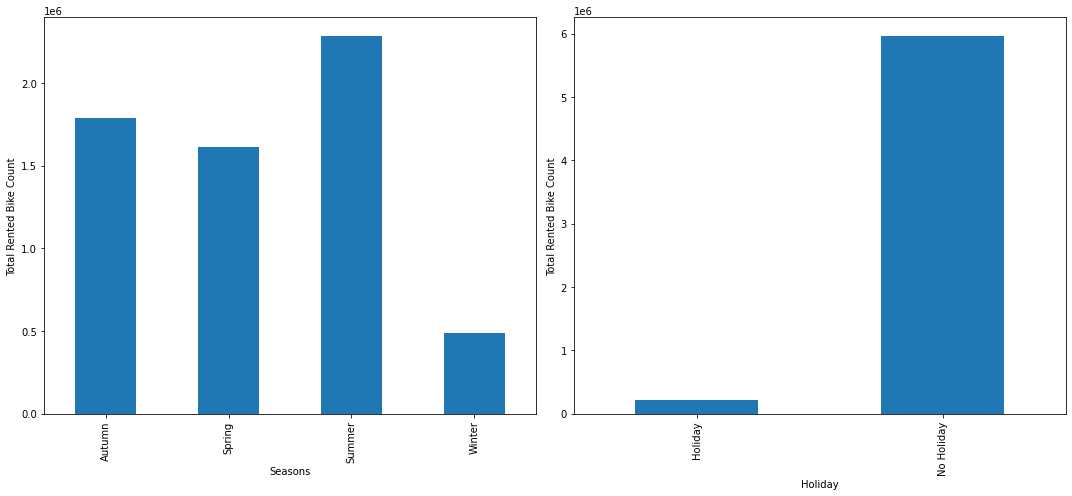

In [36]:
# Chart - 4 Lets have a view at the distribution of categorical data with respect to the count of, number of bikes rented
categorical_features=df.describe(include=('object','category')).columns
categorical_features

figure=plt.figure(figsize=(15,7))
for index,column in enumerate(categorical_features):
  feature=df[column]
  plt.subplot(1,2,index+1)
  dataset=df.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar') #kind=bar use for ploting barchart
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)


##### 1. Why did you pick the specific chart?

We have yoused the barchart as previosly used since the data is categorical(discrete).

##### 2. What is/are the insight(s) found from the chart?

1) The first figure gives us the information about the number of bikes rented in each season. We can see from the figure that most of the bikes were rented in the summer season and autmn and least number of bikees were rented in winter season, this would be a good insight as we get the info about the demand of the bikes in different seasons and can supply the number of bikes required efficiently in different seasons.

2) The second figure shows the number of bikes rented during holidays and working day.It is obvious as there will be more demand for bikes on working days as people use the bikes mostly for commuting from home to workplace.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the first insight would help in making the buisness more efficient as it provides the information regarding the demand of the bike in different seasons, so the company can priorly prepare as they have the information regarding it.

#### Chart - 5

Let's try to plot some scatter plot between independent with the dependent variable and figure out how they behaves or what they have relationship

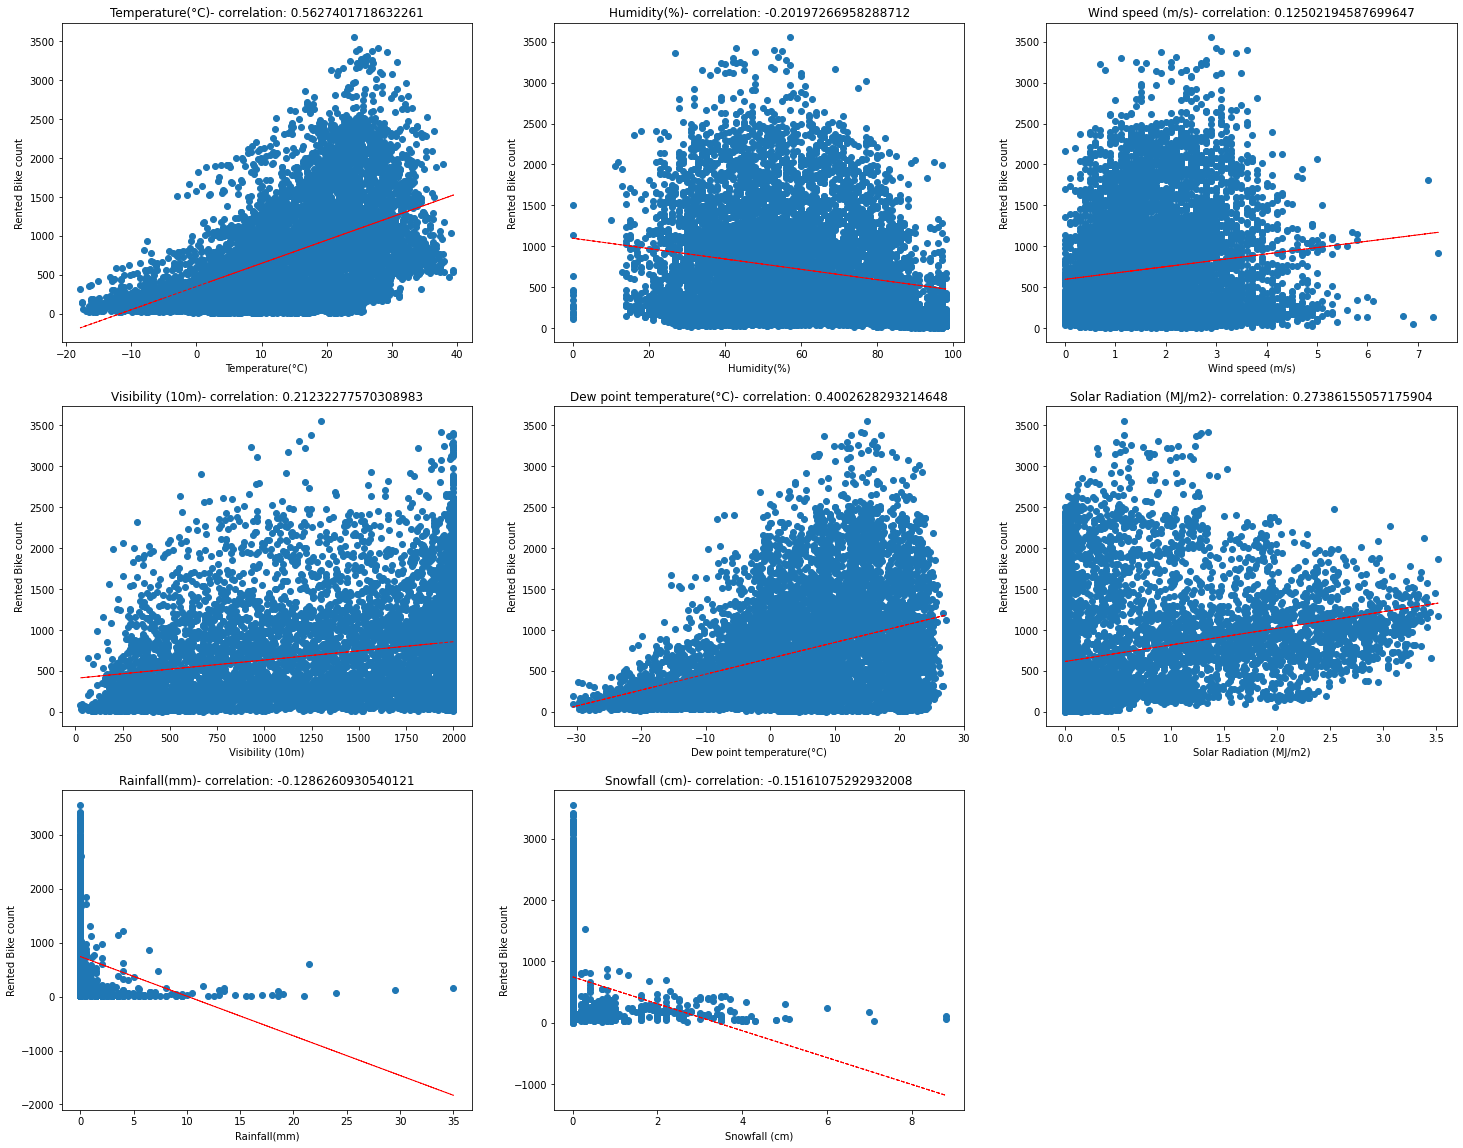

In [37]:
# Chart - 5 scatter plot between independent(numeric) with the dependent variable
numeric=['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
figure=plt.figure(figsize=(25,20))
for index,col in enumerate(numeric):
  plt.subplot(3,3,index+1)
  feature=(df[col])
  label=df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike count')
  ax=fig.gca()
  plt.title(col + '- correlation: ' + str(correlation))
  z=np.polyfit(df[col],df['Rented Bike Count'],1)
  y_hat=np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)


##### 1. Why did you pick the specific chart?



In the above chart we have used scatter plot to visualise the relationship between the dependent and the independent variable. Scatter plot is used to determine the relationship between two variables used for plotting. We have plotted a dotted line to represent the type of relationship i.e positive or negative co relation between the variables.

##### 2. What is/are the insight(s) found from the chart?

The information drawn from the above plots are as follows:
1. We can see that there are a lot of outliers present in each column of the data.
2. The variables temperature, windspeed, visibility,dew point and solar radiation are positively correlated.
3. The variables humidity, rainfall, and snowfall are negatively correlated.
4. From the plot of rainfall and snowfall we can see that most of the bikes were rented when there was zero rainfall andd snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes these metrices can be used to predict the number of bikes that may be rented as they are correlated with the dependent variable, thus it would help in the prediction leading to a positive impact on the buisness.

#### Chart - 6

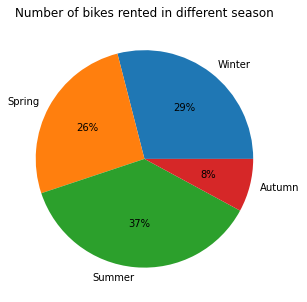

In [38]:
# Chart - 6 
figure=plt.figure(figsize=(5,5))
plt.pie(df.groupby('Seasons')['Rented Bike Count'].sum(),labels=list(df['Seasons'].unique()),autopct='%.0f%%')
plt.title('Number of bikes rented in different season')
plt.ioff()

##### 1. Why did you pick the specific chart?

We have used the pie chart to visualize the number of bikes rented in different seasons. Pie chart gives a clear understanding of the distribution of the different categories of the data.  

##### 2. What is/are the insight(s) found from the chart?

We can see that most of the bikes were rented in summer season with least rented during the autumn season.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this helps in giving a brief information to the company about the demand for the bikes in different seasons. Thus helping the buisness in a positive way. 

#### Chart - 7

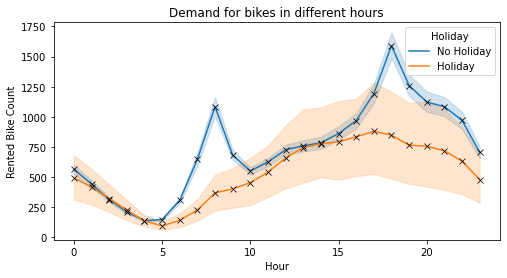

In [39]:
# Chart - 7 visualisation of demand for bikes at different hours using  line plot.
# fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10,6), dpi=100)
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", 
              hue="Holiday",marker="x",markeredgecolor="black")
plt.title('Demand for bikes in different hours')
plt.ioff()

##### 1. Why did you pick the specific chart?

A line plot is a graph that uses Xs or any icon to display the number of times a response has been recorded in a particular set of data. The Xs are generally placed along with the responses. Here the x's indicate the number of bikes rented at a particular hour.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is huge demand for bikes at 9:00AM and 9:00PM, which is obvious as people move to work and come back from work during the above intervals of time. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight helps in creating a positive impact as we got to during what time of the day there would be more demand for the bikes.

#### Chart-8

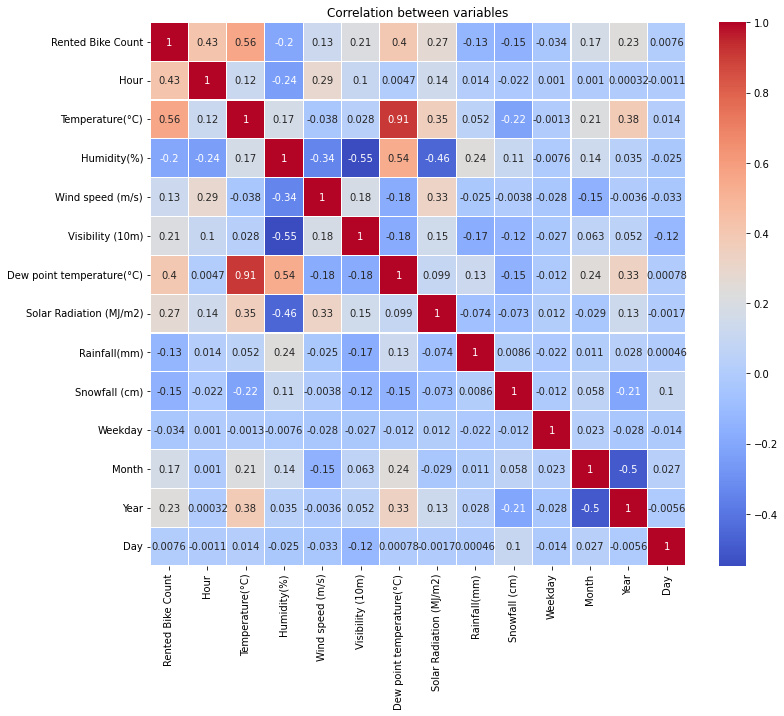

In [40]:
#Now lets visualise the correlation between the variables of the data using a heat map.
data_corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')
plt.title('Correlation between variables')
plt.ioff()

From the above heat map we can see that The dependent variable rented bike count is related more with the independent variables hour, temperature and dew point temperature. There is some significance correlation among the indepentent variables such as temperature and dew point temperature, humidity and visibility. We will be handling these in the coming parts. 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Weekday                      0
Month                        0
Year                         0
Day                          0
dtype: int64

We can see from the above that there are no missing values in the data.

### 2. Handling Outliers

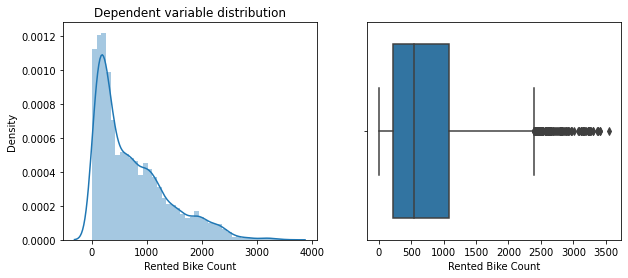

In [45]:
# Handling Outliers & Outlier treatments
#Lets handle the outliers in the dependent variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df['Rented Bike Count'])
plt.title('Dependent variable distribution')
plt.subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])
plt.ioff()

From the above we can see that the data of the dependent variable is positively skewed, lets visualise how different methods such as squareroot, cuberoot, log transformations handles the outliers.

Text(0.5, 1.0, 'cube root')

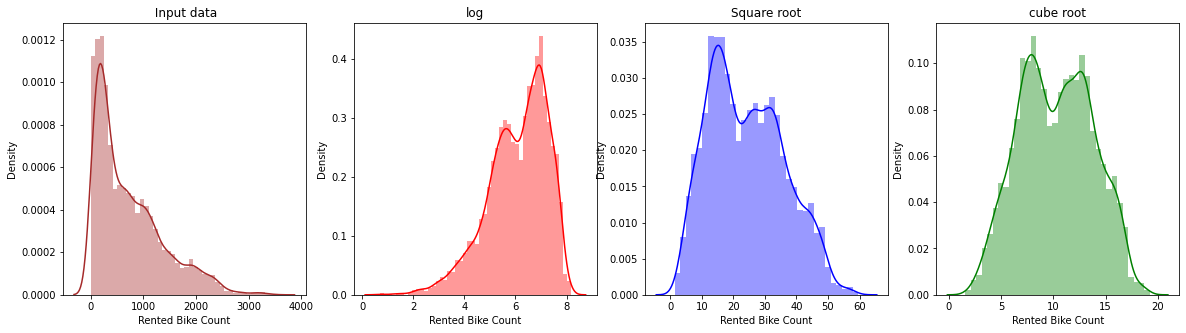

In [46]:
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((df['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log(df['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title("log") #transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(df['Rented Bike Count']*2),ax=axes[3], color='green').set_title("cube root")

From the above we can see that the cube root tranformation handles the outliers in a better way when compared to others as the data is more normal after cube root transformation. So we will be applying the cube root transformation to the dependent variable. 

In [47]:
#applying cube root to the data of dependent variable.
df['Rented Bike Count']=np.cbrt(df['Rented Bike Count'])

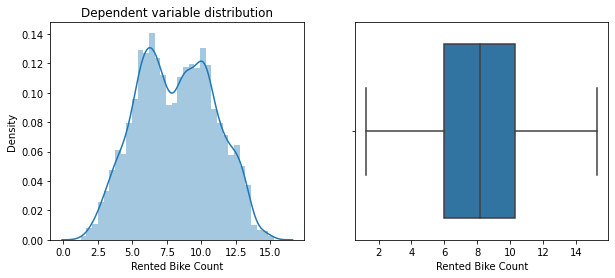

In [48]:
#Lets visualize the modified data of dependent variable using boxplot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df['Rented Bike Count'])
plt.title('Dependent variable distribution')
plt.subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])
plt.ioff()

From the above we can see that the data of the dependent variable contains no outliers and is norally distributed after the outlier treatment.

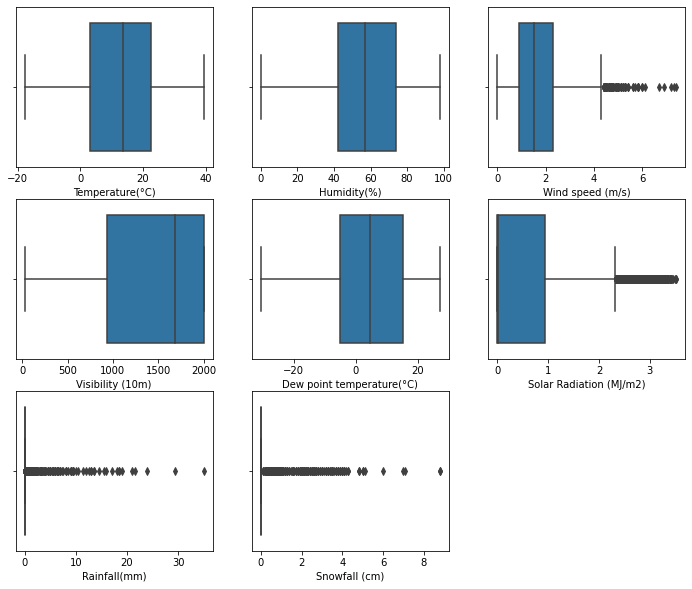

In [49]:
#Now lets visualise how independent variables are distributed and take the respective measures
plt.figure(figsize=(12,10))
for index,col in enumerate(numeric):
  plt.subplot(3,3,index+1)
  sns.boxplot(df[col])

From the above we can see that there are a lot of outliers in the columns wind speed, solar radiation, rainfall and snowfall. We

Lets check the data of Rainfall and snowfall as most of the value it contains is 0

In [50]:
#count of number of listings with snowfall 0
df[df['Snowfall (cm)']==0]['Snowfall (cm)'].count()

8022

In [51]:
#count of number of listings with snowfall 0
df[df['Rainfall(mm)']==0]['Rainfall(mm)'].count()

7949

From the above we caan see that out of 8645 records 8022 records had snowfall as 0 and 7949 records had rainfall as 0 so these columns are not of much significance ad hence we are not going to consider these column for model building.

In [52]:
#creating a copy of original data set for model building and dropping rainfall and snowfall columns.
df_m=df.copy()
df_m.drop(columns=['Rainfall(mm)','Snowfall (cm)'],inplace=True)
df_m.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Seasons,Holiday,Weekday,Month,Year,Day
0,6.333026,0,-5.2,37,2.2,2000,-17.6,0.0,Winter,No Holiday,4,12,2017,1
1,5.886765,1,-5.5,38,0.8,2000,-17.6,0.0,Winter,No Holiday,4,12,2017,1
2,5.572055,2,-6.0,39,1.0,2000,-17.7,0.0,Winter,No Holiday,4,12,2017,1
3,4.747459,3,-6.2,40,0.9,2000,-17.6,0.0,Winter,No Holiday,4,12,2017,1
4,4.272659,4,-6.0,36,2.3,2000,-18.6,0.0,Winter,No Holiday,4,12,2017,1


### 3. Categorical Encoding

The categorical columns in the data are Holiday and seasons.

In [53]:
# unique values of categorical columns are
df_m['Holiday'].value_counts()

No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64

In [54]:
df_m['Seasons'].value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

The holiday column contains two unique data no holiday and holiday, we would be encoding holiday to 0 and no holiday to 1.

In [55]:
#replacing the values of holiday column
encoder_num={'Holiday':{'No Holiday':1,'Holiday':0}}
df_m=df_m.replace(encoder_num)


The season column contains four unique values summer,winter,autumn and spring, we would be encoding this categorical column using one hot encoding. Even the hour column contains 24 unique  values ranging from 0 to 23 doing one hot encoding would help in a better predictive model as we have data seperated for each hour.

In [56]:
#one hot encoding season and hour column
df_m=pd.get_dummies(df_m,columns=['Seasons','Hour'],prefix=['S','H'])


In [57]:
df_m.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Holiday,Weekday,Month,...,H_14,H_15,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23
0,6.333026,-5.2,37,2.2,2000,-17.6,0.0,1,4,12,...,0,0,0,0,0,0,0,0,0,0
1,5.886765,-5.5,38,0.8,2000,-17.6,0.0,1,4,12,...,0,0,0,0,0,0,0,0,0,0
2,5.572055,-6.0,39,1.0,2000,-17.7,0.0,1,4,12,...,0,0,0,0,0,0,0,0,0,0
3,4.747459,-6.2,40,0.9,2000,-17.6,0.0,1,4,12,...,0,0,0,0,0,0,0,0,0,0
4,4.272659,-6.0,36,2.3,2000,-18.6,0.0,1,4,12,...,0,0,0,0,0,0,0,0,0,0


Data after one hot encoding is as follows.

Since we are performing regression analysis we are converting the categorical column seasons to numerical data using one hot encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Lets remove multicollinearity if present in the data using VIF.

In [58]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [59]:
numerical_features=['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)']

In [60]:
#calculating VIF for different variables
X=numerical_features[1:]
calc_vif(df[[i for i in X]])

,variables,VIF
0,Temperature(°C),28.747776
1,Humidity(%),4.554570
2,Wind speed (m/s),4.512618
3,Visibility (10m),8.957180
4,Dew point temperature(°C),15.373641
5,Solar Radiation (MJ/m2),2.788329


We can see that there is a very high correlation between temperature and dew point temperature, lets check how these two varriables are co related with the dependent variable and take the respective measure.

In [61]:
#Co relation between dependent variable and temperature
np.corrcoef(df['Rented Bike Count'],df['Temperature(°C)'])[0][1]

0.5964390537415173

In [62]:
#Co relation between dependent variable and temperature
np.corrcoef(df['Rented Bike Count'],df['Dew point temperature(°C)'])[0][1]

0.41224156529459793

We can see from the above that the variable temperature is related more with the dependent variable so we will be dropping the column dew point temperature. 

In [63]:
#Dropping dew point temperature column.
df_m.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [64]:
df_m.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Weekday,Month,Year,...,H_14,H_15,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23
0,6.333026,-5.2,37,2.2,2000,0.0,1,4,12,2017,...,0,0,0,0,0,0,0,0,0,0
1,5.886765,-5.5,38,0.8,2000,0.0,1,4,12,2017,...,0,0,0,0,0,0,0,0,0,0
2,5.572055,-6.0,39,1.0,2000,0.0,1,4,12,2017,...,0,0,0,0,0,0,0,0,0,0
3,4.747459,-6.2,40,0.9,2000,0.0,1,4,12,2017,...,0,0,0,0,0,0,0,0,0,0
4,4.272659,-6.0,36,2.3,2000,0.0,1,4,12,2017,...,0,0,0,0,0,0,0,0,0,0


In [65]:
numerical_features.remove('Dew point temperature(°C)')

In [66]:
#calculating VIF after manipulation
calc_vif(df[[i for i in numerical_features[1:]]])

,variables,VIF
0,Temperature(°C),2.909789
1,Humidity(%),4.232428
2,Wind speed (m/s),4.084339
3,Visibility (10m),4.273921
4,Solar Radiation (MJ/m2),2.213280


From the table we can see that all the VIF values are below 5, and hence multi co linearity is removed.



#### 2. Data Tranformation



In [67]:
#importing power tranformer
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df_m[numerical_features]=sc_X.fit_transform(df_m[numerical_features])

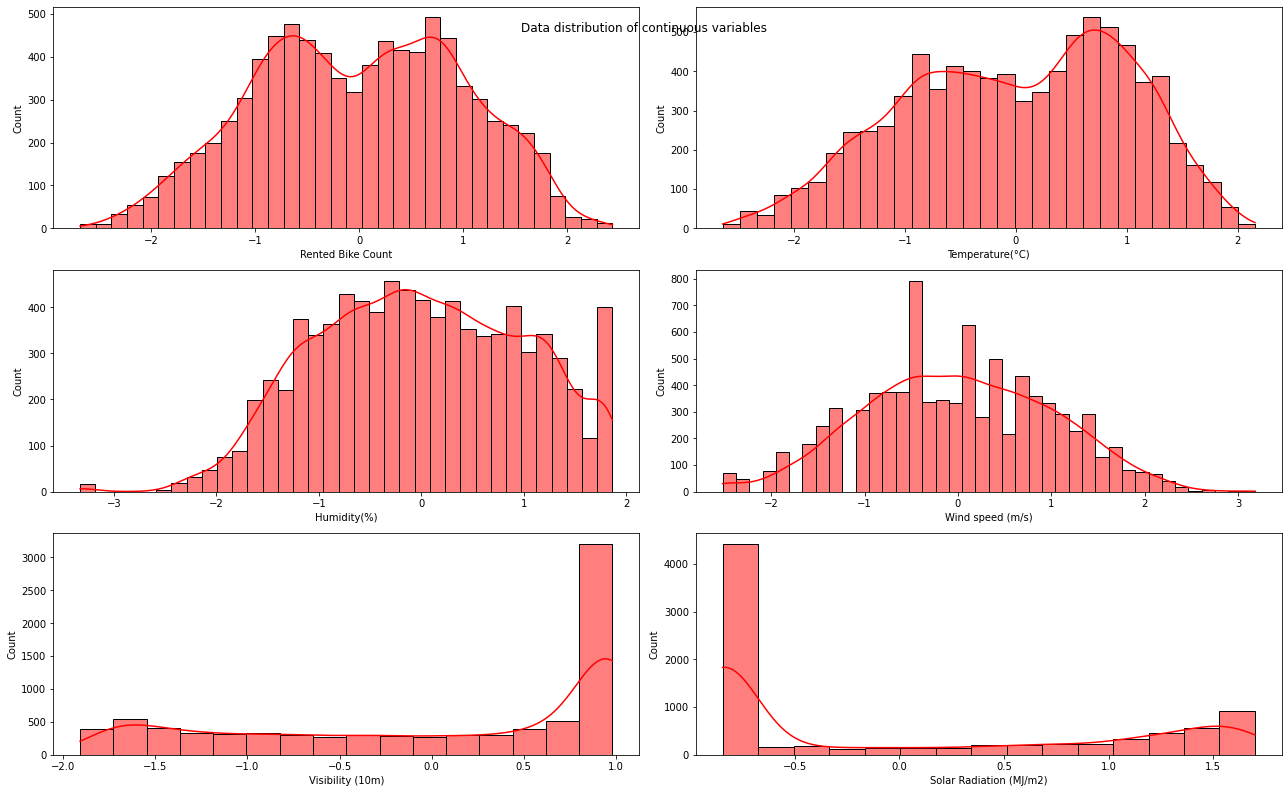

In [68]:
#numerical data after transformation.
plt.figure(figsize=(18, 18))
for i, col in enumerate(numerical_features):
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df_m, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

#### 2. Feature Selection

In [69]:
#Lets check the year variable for the values of different years present in data
df_m['Year'].value_counts()

2018    7721
2017     744
Name: Year, dtype: int64

From the above we ca see that most of the data is from the year 2018 and with a very few data from 2017 when compared to 2018, so we will be dropping the year column as it is not of much significance.

In [70]:
df_m.drop(columns=['Year'],inplace=True)

In [71]:
#the selected features for the regression model 
features=list(df_m.columns)
features.remove('Rented Bike Count')
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Holiday',
 'Weekday',
 'Month',
 'Day',
 'S_Autumn',
 'S_Spring',
 'S_Summer',
 'S_Winter',
 'H_0',
 'H_1',
 'H_2',
 'H_3',
 'H_4',
 'H_5',
 'H_6',
 'H_7',
 'H_8',
 'H_9',
 'H_10',
 'H_11',
 'H_12',
 'H_13',
 'H_14',
 'H_15',
 'H_16',
 'H_17',
 'H_18',
 'H_19',
 'H_20',
 'H_21',
 'H_22',
 'H_23']

The above are the features selected for modelling as they exhibit correaltion with the dependent variable and play an important role in predicting the dependent variable.

### 6. Data Scaling

In [72]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X=df_m[features]
Y=df_m.iloc[:,0]
sc=StandardScaler()
X=sc.fit_transform(X)


Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
We have used the standard scaler for the scaling of the data, as previously we had applied different methods to transform data ito normal form.

### 8. Data Splitting

In [73]:
# Splitting the data to train and test.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 10) 
print(X_train.shape)
print(X_test.shape)

(6772, 37)
(1693, 37)


Here we have used a splitting ratio of 0.2, we have considered to use 80% of data for training the model and the remaining 20% for testing the trained model.

## ***7. ML Model Implementation***

### ML Model - Linear Regression

In [74]:
# ML Model - 1 Implementation
#importing linear regression model
from sklearn.linear_model import LinearRegression
#training the model
reg = LinearRegression().fit(X_train, y_train)


In [75]:
#score of the trained model
reg.score(X_train,y_train)

0.7166670754008169

In [76]:
#coeeficients of the model parameters of the trained model
reg.coef_

array([ 3.88309293e-01, -2.60798857e-01, -3.08316290e-02,  7.88917671e-03,
        3.60817816e-01,  5.66022187e-02, -4.12916657e-02,  6.13567357e-02,
        1.77364590e-03,  4.77611344e+12,  4.95666047e+12,  4.99231939e+12,
        4.95666047e+12,  1.43485926e+12,  1.43485926e+12,  1.43485926e+12,
        1.43485926e+12,  1.43485926e+12,  1.43485926e+12,  1.43485926e+12,
        1.43680741e+12,  1.43680741e+12,  1.43680741e+12,  1.43680741e+12,
        1.43680741e+12,  1.43680741e+12,  1.43680741e+12,  1.43680741e+12,
        1.43680741e+12,  1.43680741e+12,  1.43680741e+12,  1.43680741e+12,
        1.43680741e+12,  1.43680741e+12,  1.43680741e+12,  1.43680741e+12,
        1.43680741e+12])

In [77]:
#predictinng values using the trained model for test set.
y_pred = reg.predict(X_test)

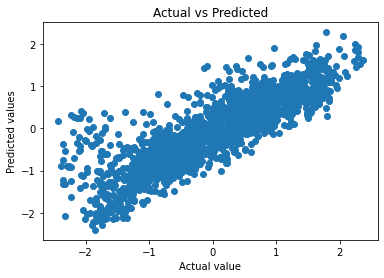

In [78]:
#plotting predicted vs actual value
plt.scatter((y_test), (y_pred))
plt.xlabel('Actual value')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.ioff()

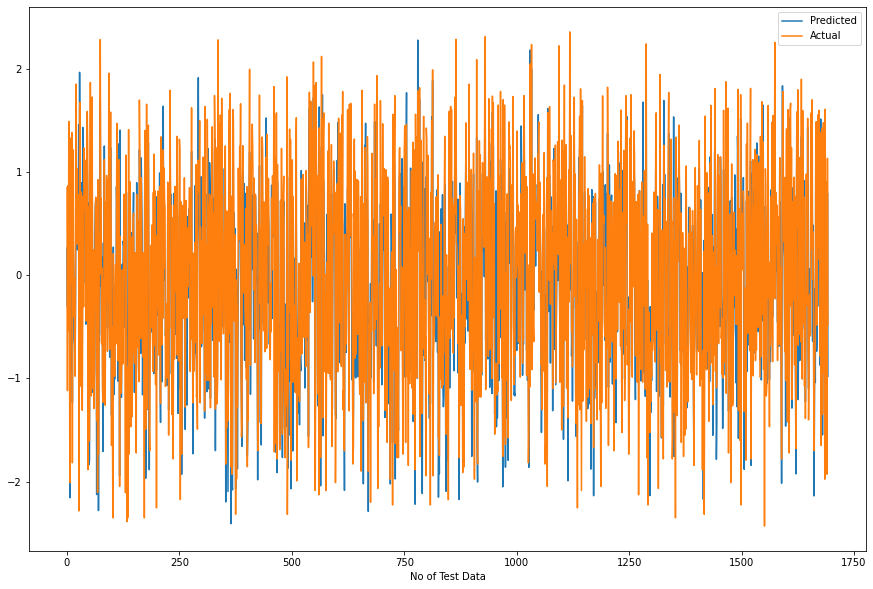

In [79]:
#visualising the predicted and actual values
plt.figure(figsize=(15,10))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
#Values of different model evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.2942638567022046
MAE : 0.4011244813053034
RMSE : 0.542460926428996


In [81]:
#R2 score for the model
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7189635863282666
Adjusted R2 :  0.7126805970195934


The R2 score tells that the above model can predict the 72% of change in the dependent variable which is is an above average score.

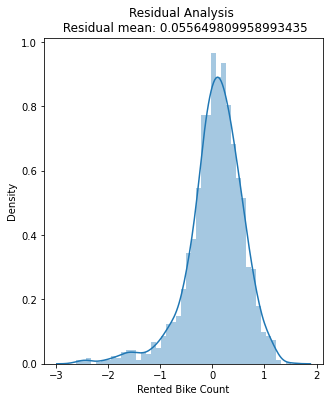

In [82]:
#residual analysis
fig=plt.figure(figsize=(5,6))
  
sns.distplot(((y_test)-(y_pred)))
m=np.mean(y_test-y_pred)
plt.title('Residual Analysis \n'+f' Residual mean: {m}')
plt.show()   

From the above chart we can see that residual mean is 0.05 which is close to 0 so it obeys the assumption of linear regression.

#### 2. Cross- Validation

In [83]:
#Cross validation of the odel using 5 folds
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
print(f'Cross validation Scores: {scores}')
print(f'Mean of the obtained scores: {np.mean(scores)}')


Cross validation Scores: [0.69033087 0.73624299 0.72091212 0.72178955 0.70286   ]
Mean of the obtained scores: 0.7144271047802244


From the above we can see that we have got a mean score of 0.714 from the 5 fold cross validation.

### ML Model - 2

#### Linear Regression model from stats.api

In [84]:
#importing statsmodel
import statsmodels.api as sm
#training the ordinary least squares model
lin_reg=sm.OLS(y_train,X_train).fit()


In [85]:
df_m.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Holiday', 'Weekday', 'Month', 'Day', 'S_Autumn', 'S_Spring',
       'S_Summer', 'S_Winter', 'H_0', 'H_1', 'H_2', 'H_3', 'H_4', 'H_5', 'H_6',
       'H_7', 'H_8', 'H_9', 'H_10', 'H_11', 'H_12', 'H_13', 'H_14', 'H_15',
       'H_16', 'H_17', 'H_18', 'H_19', 'H_20', 'H_21', 'H_22', 'H_23'],
      dtype='object')

In [86]:
#summary of the trained model
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              489.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):                        0.00
Time:                        05:08:03   Log-Likelihood:                         -5286.3
No. Observations:                6772   AIC:                                  1.064e+04
Df Residuals:                    6737   BIC:                                  1.088e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3885      0.015     25.999      0.000       0.359       0.418
x2            -0.2605      0.010    -25.342      0.000      -0.281      -0.240
x3            -0.0327      0.008     -4.264      0.000      -0.048      -0.018
x4             0.0078      0.008      0.921      0.357      -0.009       0.024
x5             0.3638      0.019     19.445      0.000       0.327       0.400
x6             0.0567      0.007      8.714      0.000       0.044       0.069
x7            -0.0395      0.006     -6.141      0.000      -0.052      -0.027
x8             0.0636      0.009      7.357      0.000       0.047       0.081
x9             0.0004      0.007      0.061      0.951      -0.012       0.013
x10            0.1150      0.006     18.416      0.000       0.103       0.127
x11            0.0176      0.006      3.122      0.002       0.007       0.029
x12            0.0195      0.009      2.235      0.025       0.002       0.037
x13           -0.1481      0.009    -15.619      0.000      -0.167      -0.130
x14            0.0633      0.007      9.135      0.000       0.050       0.077
x15            0.0289      0.007      4.222      0.000       0.015       0.042
x16           -0.0270      0.007     -3.984      0.000      -0.040      -0.014
x17           -0.0823      0.007    -12.158      0.000      -0.096      -0.069
x18           -0.1335      0.007    -19.687      0.000      -0.147      -0.120
x19           -0.1284      0.007    -18.721      0.000      -0.142      -0.115
x20           -0.0294      0.007     -4.377      0.000      -0.043      -0.016
x21            0.0650      0.006     10.240      0.000       0.053       0.077
x22            0.1130      0.006     17.503      0.000       0.100       0.126
x23           -0.0236      0.007     -3.551      0.000      -0.037      -0.011
x24           -0.1138      0.007    -15.747      0.000      -0.128      -0.100
x25           -0.1163      0.007    -15.542      0.000      -0.131      -0.102
x26           -0.1104      0.008    -14.530      0.000      -0.125      -0.095
x27           -0.1094      0.008    -14.463      0.000      -0.124      -0.095
x28           -0.1093      0.008    -14.546      0.000      -0.124      -0.095
x29           -0.0866      0.007    -11.889      0.000      -0.101      -0.072
x30           -0.0529      0.007     -7.466      0.000      -0.067      -0.039
x31            0.0270      0.007      4.068      0.000       0.014       0.040
x32            0.1365      0.006     21.768      0.000       0.124       0.149
x33            0.1385      0.006     21.881      0.000       0.126       0.151
x34            0.1521      0.007     22.354      0.000       0.139       0.165
x35            0.1563      0.007     22.561      0.000       

### ML Model - 3

In [87]:
# Regularized linear regression - Lasso Regression
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [88]:
lasso.score(X_train, y_train)

0.7158172879046184

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
y_pred_l = lasso.predict(X_test)

In [90]:
MSE  = mean_squared_error((y_test),(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.2925734669809563
MAE : 0.3955766650708024
RMSE : 0.5409006073031868
R2 : 0.7205779914077457
Adjusted R2 :  0.7143310945389159


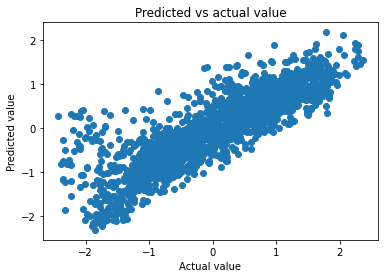

In [91]:
# Visualizing evaluation Metric Score chart
plt.scatter((y_test),(y_pred_l))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Predicted vs actual value')
plt.show()

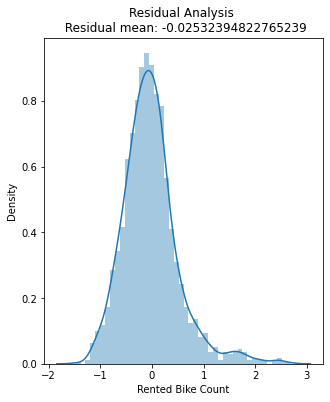

In [92]:
residue=y_pred_l-y_test
plt.figure(figsize=(5,6))
sns.distplot(residue)
m=np.mean(residue)
plt.title('Residual Analysis \n'+f' Residual mean: {m}')
plt.show()

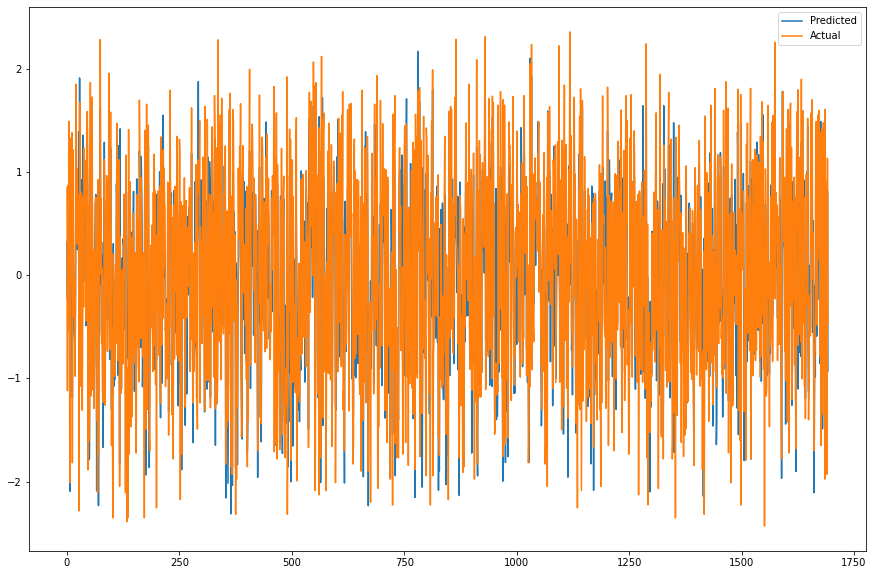

In [93]:
#visualising the predicted and actual values
plt.figure(figsize=(15,10))
plt.plot((y_pred_l))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,5e-5,1e-4,25e-4,5e-4,1e-2,5e-2,1e-1,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 5e-05,
                                   0.0001, 0.0025, 0.0005, 0.01, 0.05, 0.1, 1,
                                   5, 10, 20]},
             scoring='r2')

In [95]:
lasso_regressor.score(X_train,y_train)

0.7177136408856808

In [96]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the r2 score is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0005}

Using  {'alpha': 0.0005}  the r2 score is:  0.7145048403109284


In [97]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [98]:
MSE  = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.29151778133618717
MAE : 0.395414674399274
RMSE : 0.5399238662405906
R2 : 0.7215862229686842
Adjusted R2 :  0.7153618666241774


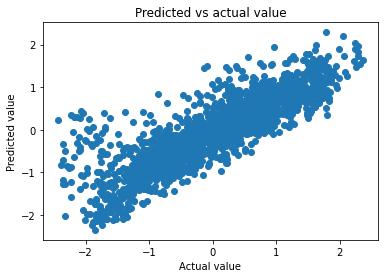

In [99]:
# Visualizing evaluation Metric Score chart
plt.scatter((y_test),(y_pred_lasso))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Predicted vs actual value')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used the gridsearch cv as the optimization technique. GridSearchCV implements the most obvious way of finding an optimal value for anything — it simply tries all the possible values (that you pass) one at a time and returns which one yielded the best model results, based on the scoring that you want, such as accuracy on the test set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is not much of a difference as the alpha value of 0.005 is the best value which was previously the default value. The evaluation metrices almost remains the same and there is no notable difference.

### ML Model - 4

In [102]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [103]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [104]:
ridge.score(X_train, y_train)

0.7177334555490493

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
y_pred_r = ridge.predict(X_test)

In [107]:
MSE  = mean_squared_error((y_test),(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.291589044829035
MAE : 0.39556028878193705
RMSE : 0.5399898562279064
R2 : 0.7215181628382961
Adjusted R2 :  0.7152922849077927


Text(0, 0.5, 'Predicted selling price')

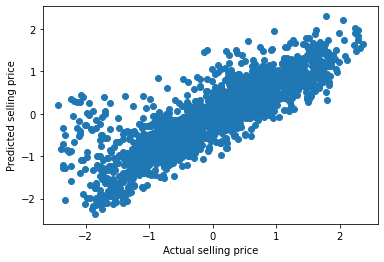

In [108]:
plt.scatter((y_test),(y_pred_r))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

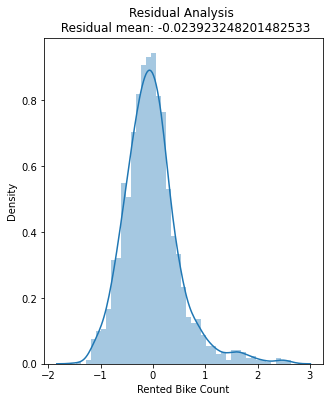

In [112]:
residue=y_pred_r-y_test
plt.figure(figsize=(5,6))
sns.distplot(residue)
m=np.mean(residue)
plt.title('Residual Analysis \n'+f' Residual mean: {m}')
plt.show()

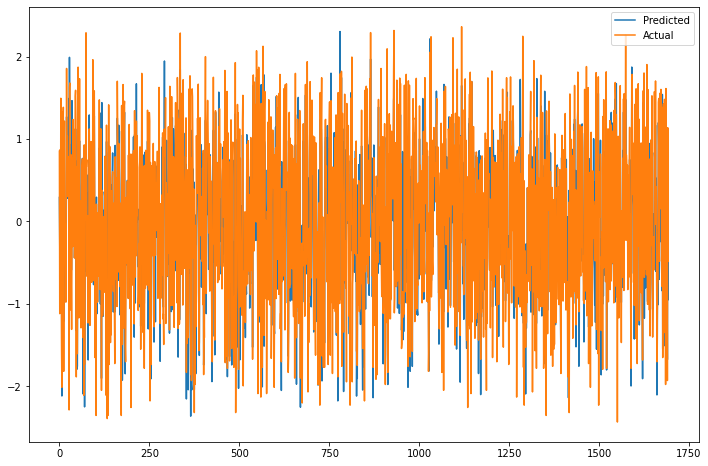

In [110]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [127]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                   30, 40, 45, 50]},
             scoring='r2')

In [128]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the r2 score is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 7}

Using  {'alpha': 7}  the r2 score is:  0.7144800361709494


In [129]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [130]:
MSE  = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.2915698885412967
RMSE : 0.5399721182999143
R2 : 0.721536458032499
Adjusted R2 :  0.715310989118422


Text(0, 0.5, 'Predicted selling price')

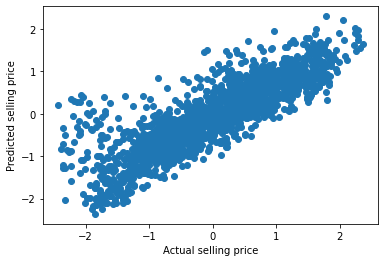

In [131]:
plt.scatter((y_test), (y_pred_ridge))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

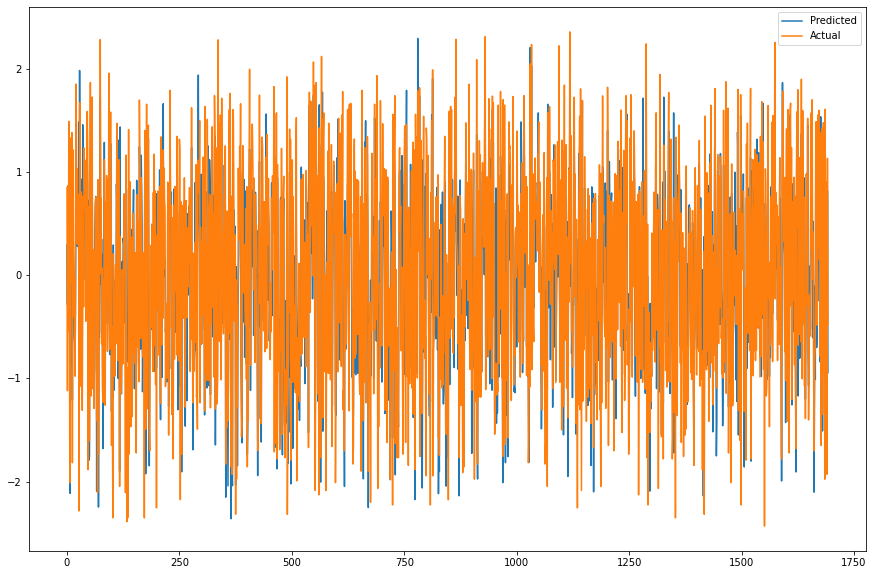

In [132]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

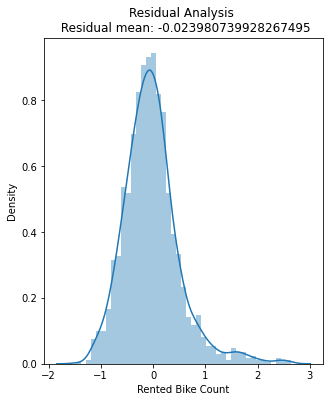

In [133]:
residue=y_pred_ridge-y_test
plt.figure(figsize=(5,6))
sns.distplot(residue)
m=np.mean(residue)
plt.title('Residual Analysis \n'+f' Residual mean: {m}')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used the gridsearch cv as the optimization technique. GridSearchCV implements the most obvious way of finding an optimal value for anything — it simply tries all the possible values (that you pass) one at a time and returns which one yielded the best model results, based on the scoring that you want, such as accuracy on the test set. We have used the r2 scoring for testing the values of different hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is not much of a difference, the alpha value chosen is 7 and is the best value. The evaluation metrices almost remains the same and there is no notable difference.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

There are several evaluation metrices that can be used to assess the performance of a linear regression model, but some of the commonly used metrices for evaluating the positive impact of a linear regression model are Mean squared error(MSE), root mean squared error(RMSE), R2 squared, Mean absolute error(MAE) etc.

Here I would like to consider the R2 square for a postive buisness impact. R2 score ranges from 0 to 2, where 0 indicates the model explains none of the variability in the dependent variable and 1 indicates that model explains all the variability of the dependent variable. So it would suggest how the model is capturing the changes in the dependent variable, which is very much necessary in these kind of buisnesses. Additionally its important to consider other evaluation metrices such as MSE and MAE to get a more comprehensive view of model performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the created models I would choose the ridge regression a

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [100]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [101]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***